Import the data set

In [23]:
import opendatasets as od

In [24]:
od.download("https://www.kaggle.com/datasets/gti-upm/leapgestrecog")

Skipping, found downloaded files in ".\leapgestrecog" (use force=True to force download)


Preprocess the images by converting them into numpy arrays and classify each image as a hand gesture

In [25]:
import os
from os import listdir
import numpy as np
from numpy import asarray
from skimage import io, transform

arr_x = []
arr_y = []

ogfolder = os.listdir("leapGestRecog")
ogfolder = np.delete(ogfolder, -1)
for folder_person in ogfolder:
    label = 0
    folder_person = "leapGestRecog/" + folder_person
    for folder in os.listdir(folder_person):
        folder = folder_person + "/" + folder
        folder_images = os.listdir(folder)
        if(folder_images[0] == '.ipynb_checkpoints'):
            folder_images = np.delete(folder_images, 0)
        for image in folder_images:
            im = io.imread(folder + "/" + image)
            im = im.reshape(240, 640, 1)
            im = transform.resize(im, (32, 85, 1))
            arr_x.append(asarray(im))
            arr_y.append([label])
        label +=1
        
X = np.array(arr_x) 
Y = np.array(arr_y)

Split the dataset into train and test

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 10)


Creating the model

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 85, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 83, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 39, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 19, 64)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 17, 64)         36928     
                                                                 
 flatten_2 (Flatten)         (None, 4352)             

Splitting train set into train and validation. Compiling and fitting the model

In [29]:
part_train_x, val_X, part_train_y ,val_Y = train_test_split(X_train, Y_train, test_size = .3, random_state = 10)


earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(part_train_x, part_train_y, epochs=25, 
                    validation_data=(val_X, val_Y), callbacks = [earlystopping])

Epoch 1/25
307/307 [==============================] - 32s 90ms/step - loss: 0.5040 - accuracy: 0.8350 - val_loss: 0.0479 - val_accuracy: 0.9895
Epoch 2/25
307/307 [==============================] - 26s 86ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0136 - val_accuracy: 0.9979
Epoch 3/25
307/307 [==============================] - 25s 81ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0173 - val_accuracy: 0.9936
Epoch 4/25
307/307 [==============================] - 24s 79ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.0066 - val_accuracy: 0.9981
Epoch 5/25
307/307 [==============================] - 25s 80ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 6/25
307/307 [==============================] - 24s 79ms/step - loss: 6.1343e-04 - accuracy: 0.9998 - val_loss: 0.0044 - val_accuracy: 0.9988
Epoch 7/25
307/307 [==============================] - 24s 79ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0197 - val_accur

Plotting the model's loss and accuracy

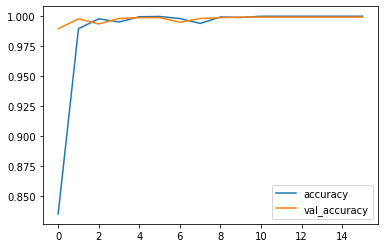

In [30]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
leg = ax.legend();

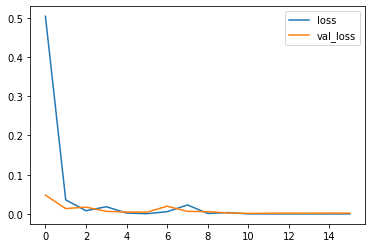

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label = 'val_loss')
leg = ax.legend();

In [32]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print(test_acc)
print(test_loss)

188/188 - 5s - loss: 0.0055 - accuracy: 0.9995 - 5s/epoch - 26ms/step
0.9994999766349792
0.005492622498422861
